In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import os
path = os.path.abspath("Data")+os.path.sep
filename = path + "water_quality.csv"

In [3]:
# fits the scatter points with many polynomial degrees minimizing the squared error, which is reported.
# the length of the 'colors' array determines the number of polynomial degrees to try
def fit_scatter_and_plot(var_x, var_y, xs, ys, unit_x, unit_y, colors):
    for c, degree in zip(colors, range(1, len(colors) + 1, 1)):
        coefficients, least_squared_error, _, _, _ = np.polyfit(xs, ys, degree, full=True)
        p = np.poly1d(coefficients)
        rcoeff = np.corrcoef(xs,ys)
        #print(rcoeff)
        rcoeff = rcoeff[0][1]
        #print(rcoeff)
        results = {}
        results['polynomia'] = coefficients.tolist()
        
        #R squared corelation coefficient
      
      
        y_hat = p(xs)
        y_bar =np.sum(xs)/len(ys)
        ssreg = np.sum((y_hat - y_bar)**2)
        sstot = np.sum((ys - y_bar)**2)
        r_squared = ssreg/sstot ** 2
        #print(r_squared)
        results['determination'] = r_squared
        plt.plot(np.unique(xs), p(np.unique(xs)), c, label='deg %d, SE = %.2f, \n R = %.2f' % (degree, least_squared_error, rcoeff))
    plt.scatter(xs, ys)
    plt.xlabel(var_x + ' ' + unit_x)
    plt.ylabel(var_y + ' ' + unit_y)
    plt.title(var_x + ' and ' + var_y)
    plt.legend(bbox_to_anchor = (1, 1), loc=2)

In [4]:
# further process of the data frame
def split_on_variables_then_merge_data_frames_on_keys(frame, keys, var1, var2):
    selected_rows = frame[(frame['determinand.label'] == var1) | (frame['determinand.label'] == var2)]
    left_frame = selected_rows[selected_rows['determinand.label'] == var1]
    right_frame = selected_rows[selected_rows['determinand.label'] == var2]
    merged = pd.merge(left_frame, right_frame, on=keys)
    return merged

In [5]:
import operator
data = pd.read_csv(filename)
df = data[['determinand.label', 'result', 'determinand.unit.label', 'water body']]

grouped = df.groupby(['determinand.label', 'determinand.unit.label'])['result'].agg([pd.np.min, pd.np.max, pd.np.mean, pd.np.std, 'count'])

filtered = grouped[grouped['count'] > 15]
pd.DataFrame.sort_values(filtered, "count", ascending=False)
#del filtered['count']

,,amin,amax,mean,std,count
determinand.label,determinand.unit.label,,,,,
Ammonia(N),mg/l,0.03000,9.1700,0.577450,1.457473,60
N Oxidised,mg/l,0.62000,7.2900,2.721636,1.856487,55
Nitrite-N,mg/l,0.00400,0.2080,0.029571,0.038017,55
Nitrate-N,mg/l,0.61300,7.1900,2.692436,1.833456,55
Temp Water,cel,6.70000,21.6000,14.259615,2.894570,52
Orthophospht,mg/l,0.06200,0.9730,0.232942,0.164296,52
pH,phunits,6.85000,8.3600,7.956304,0.270320,46
Cond @ 25C,us/cm,538.00000,2557.0000,903.552632,403.940302,38
NH3 un-ion,mg/l,0.00048,0.0371,0.003339,0.006427,38


In [6]:
# process data frame, select columns of interest.
df2 = data[['determinand.label', 'result', 'determinand.unit.label', 'sample.sampleDateTime', 'Waterbody ID']]

In [7]:
#for pair in intertools.combinations(variables):
#    print(pair)
from sklearn.metrics import r2_score

variables = ['Ammonia(N)', 'N Oxidised', 'Nitrate-N', 'Nitrite-N', 'Orthophospht', 'pH', 'Temp Water']
keys = ['Waterbody ID', 'sample.sampleDateTime']
colors = ['r', 'g', 'b']
figure = 0

for x in variables:
    for y in variables:
        if(x != y):
            merged_df = split_on_variables_then_merge_data_frames_on_keys(frame=df2, keys=keys, var1=x, var2=y)
            # get the ingredients to produce the plot
            xs, ys = merged_df['result_x'], merged_df['result_y']
            var_x, var_y = merged_df['determinand.label_x'][0], merged_df['determinand.label_y'][0]
            unit_measure_x, unit_measure_y = merged_df['determinand.unit.label_x'][0], merged_df['determinand.unit.label_y'][0]

            plt.figure(figure)
            figure+=1
            fit_scatter_and_plot(var_x=var_x, var_y=var_y, xs=xs, ys=ys, unit_x=unit_measure_x, unit_y=unit_measure_y, colors=colors)

C:\Users\guytu\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [8]:
# create a left and right data frame (to separate the variables) and then do an inner join 
# on the water body and date.
# (i.e. pick the measurements that were taken at the same time and place)

In [9]:
# TO DO
# 1. fit curve/ polynomial and display it in the graph (we may try different degrees)
# 2. report squared error
# 3. if the relation is linear, computer Pearson index coefficient. Otherwise, I don't know
# 4. talk about the relation

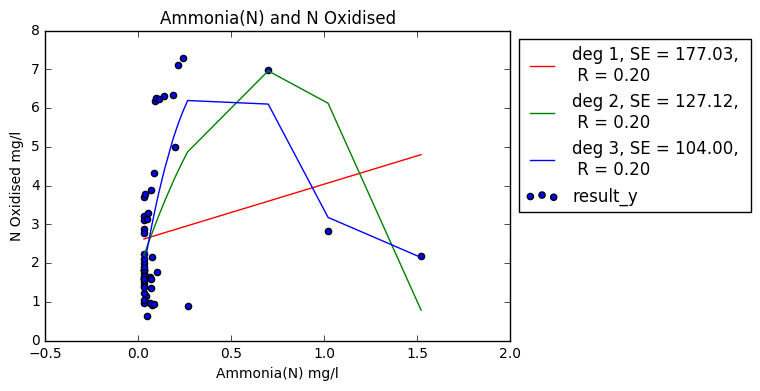

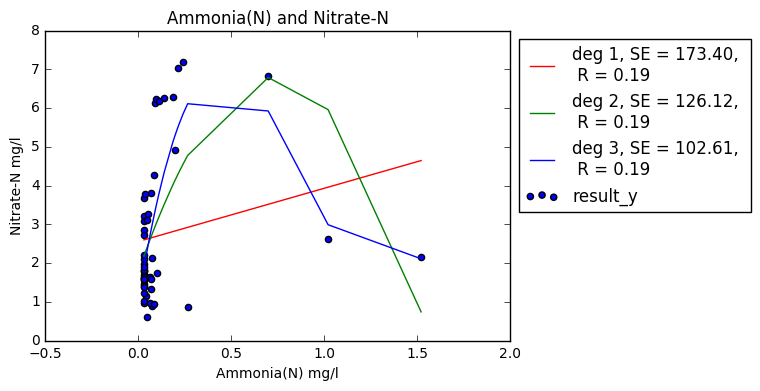

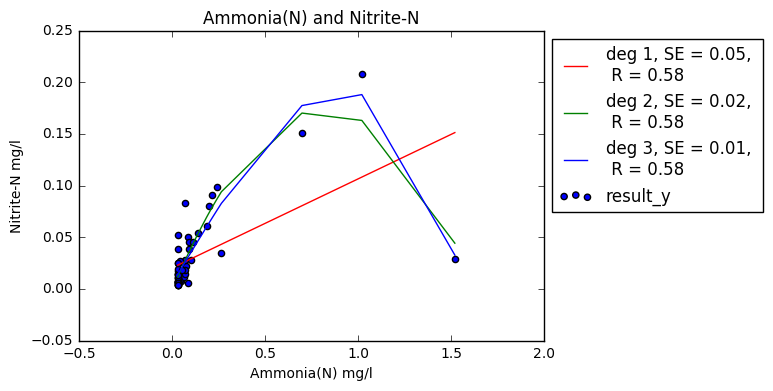

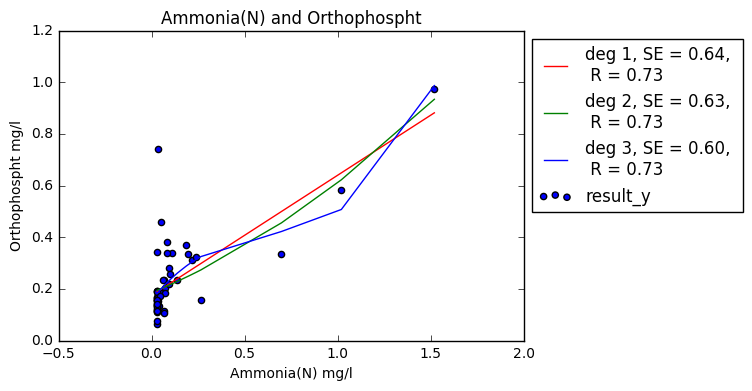

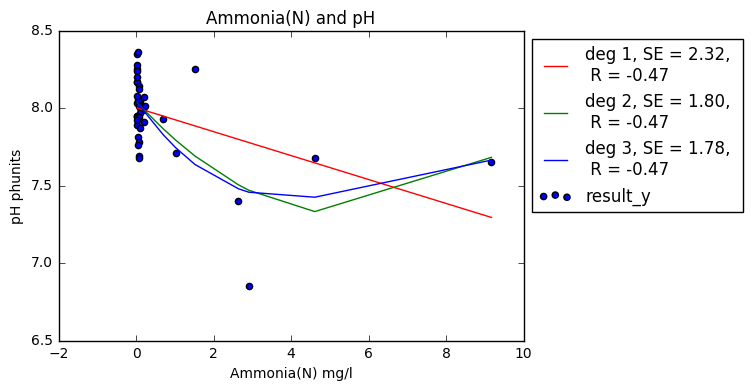

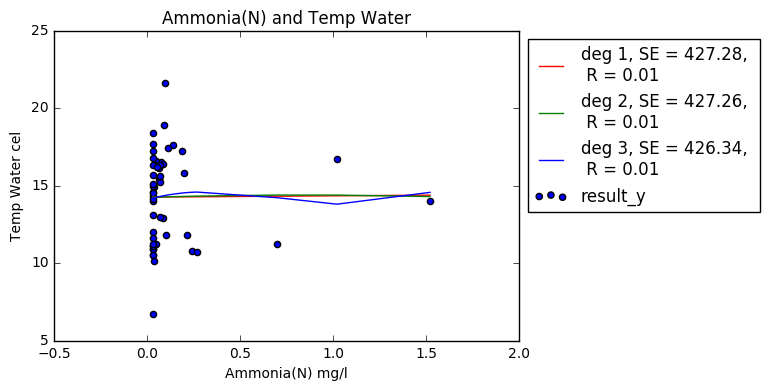

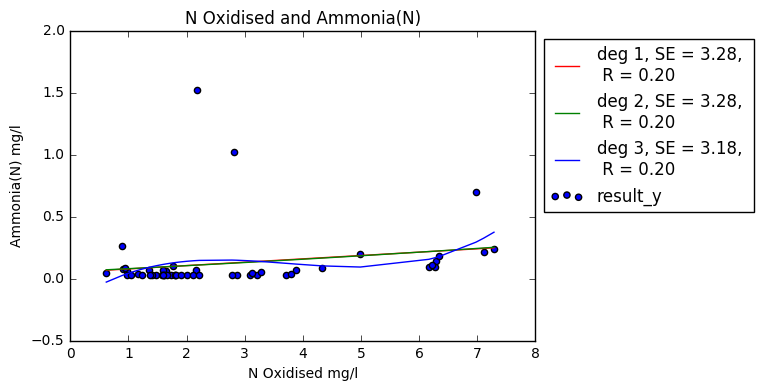

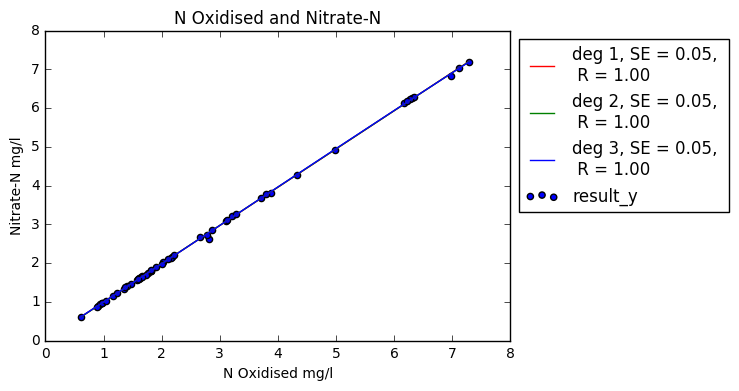

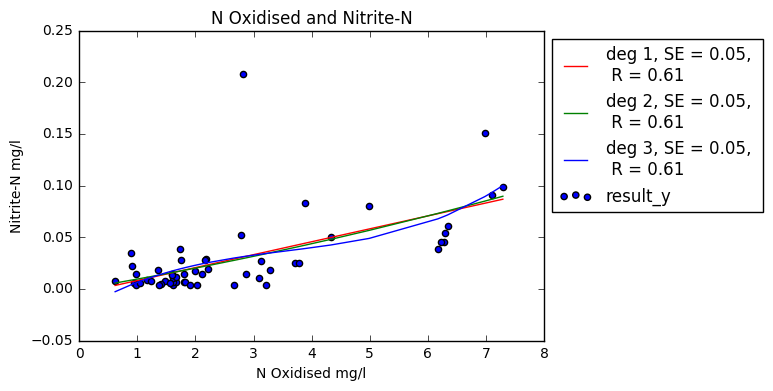

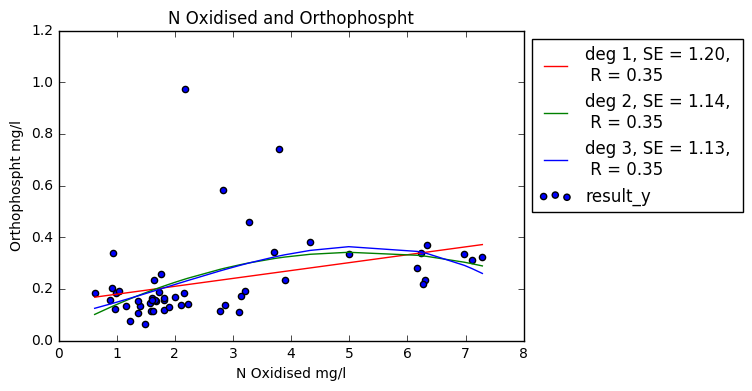

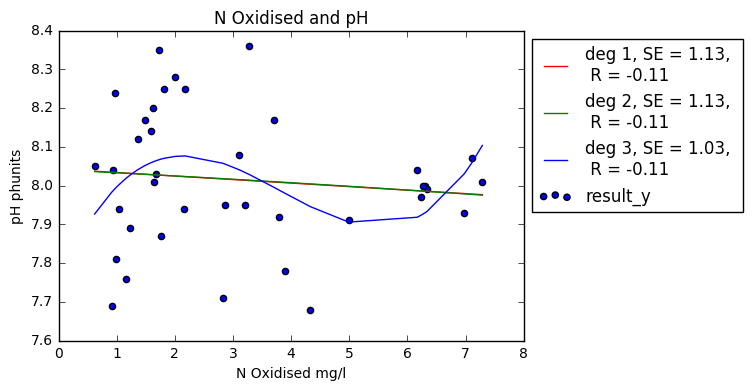

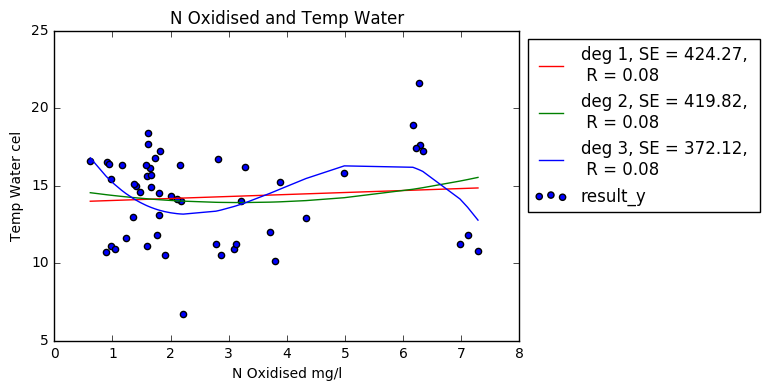

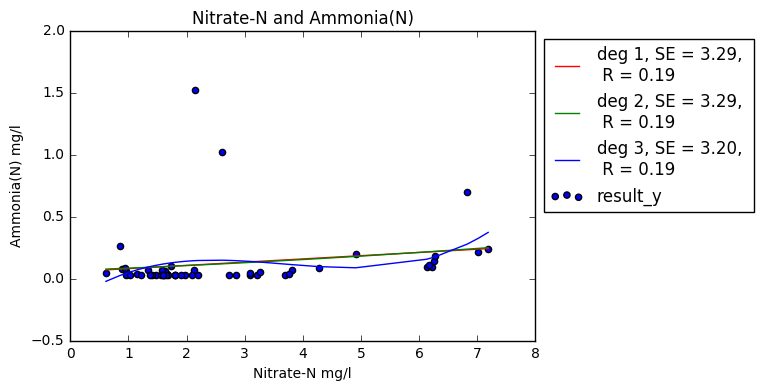

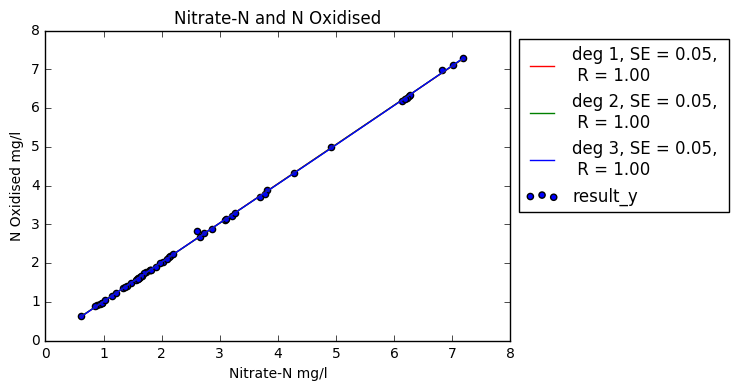

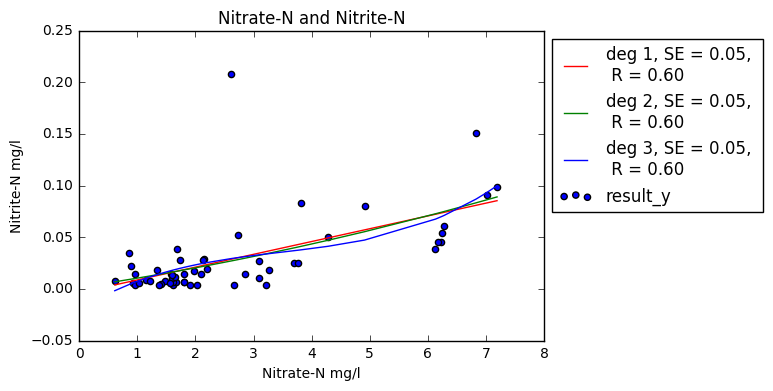

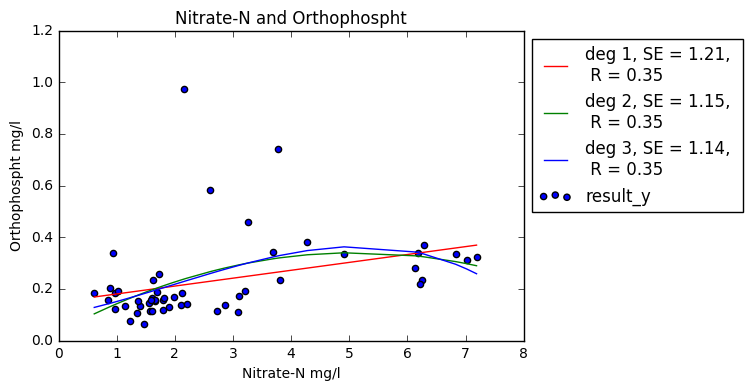

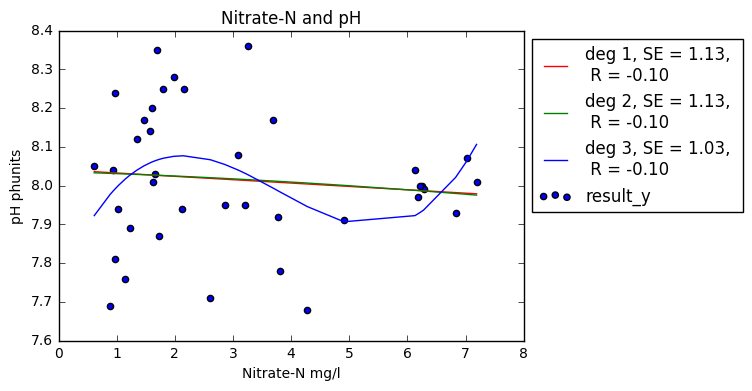

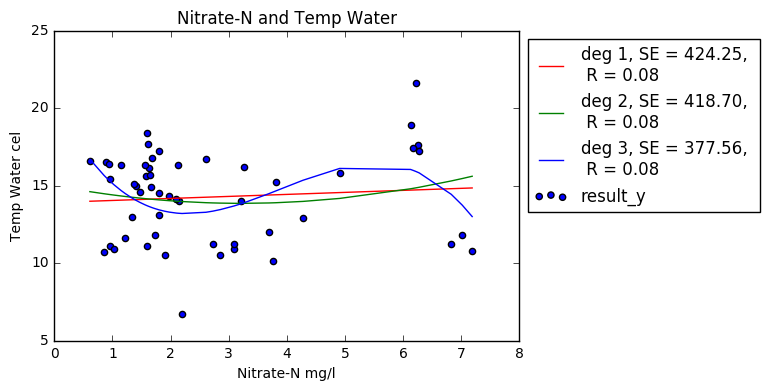

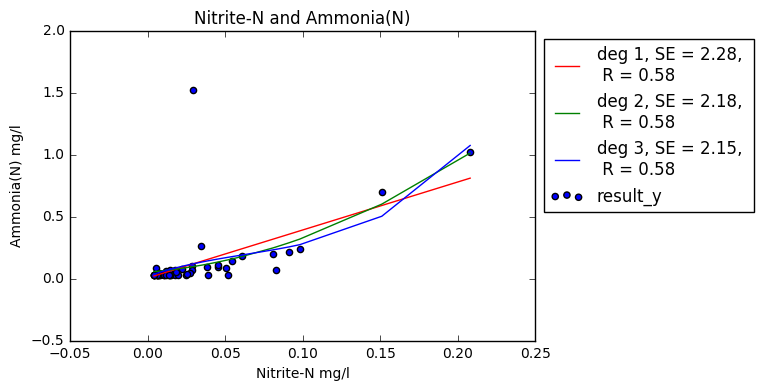

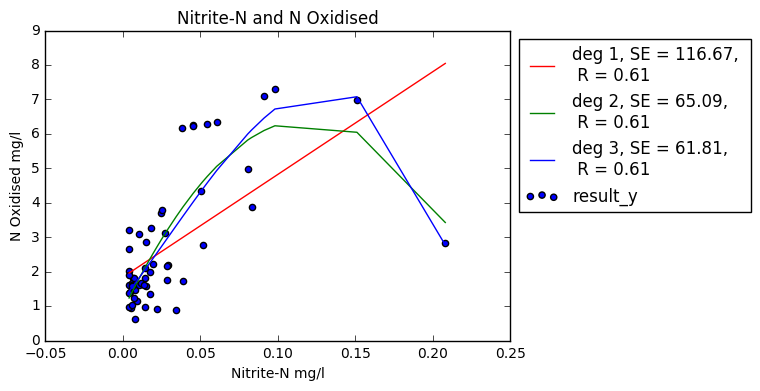

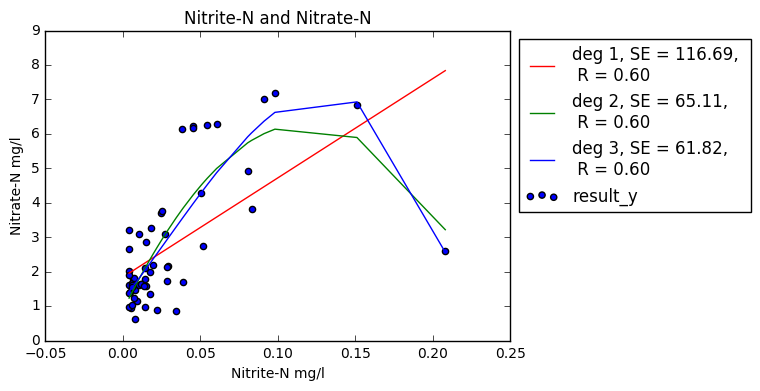

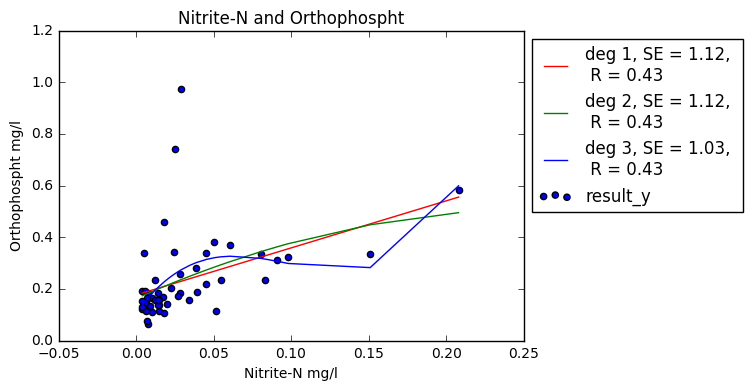

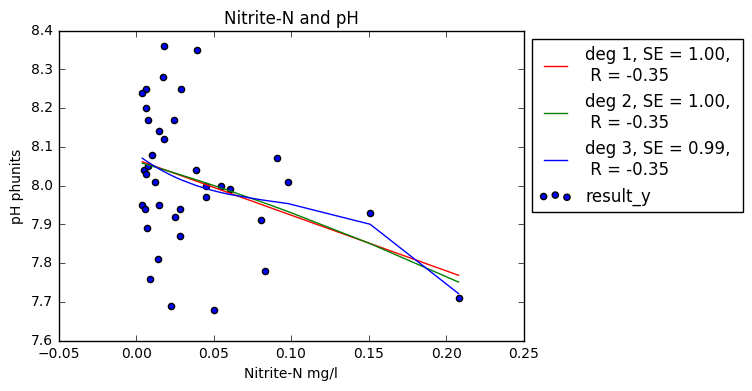

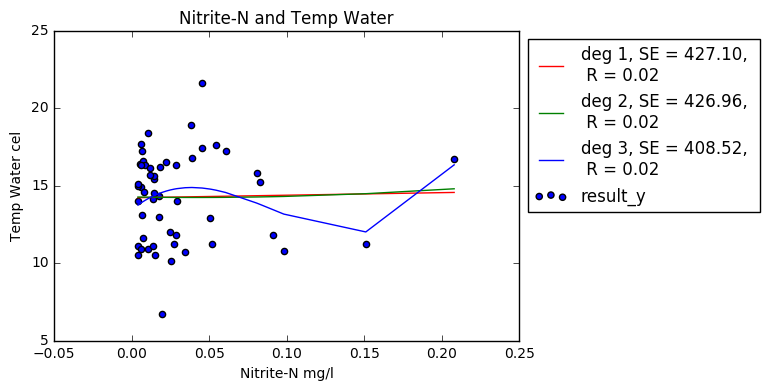

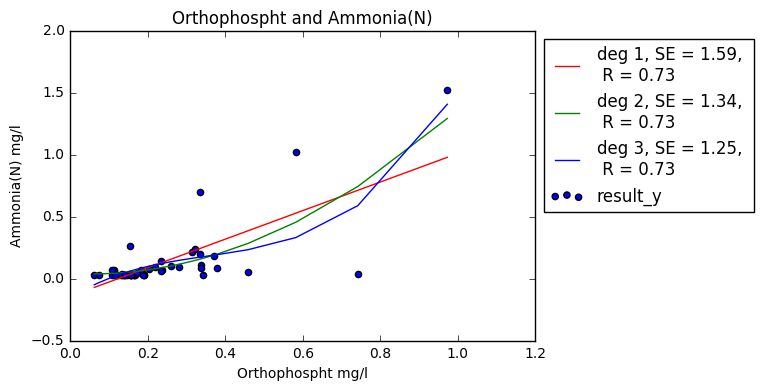

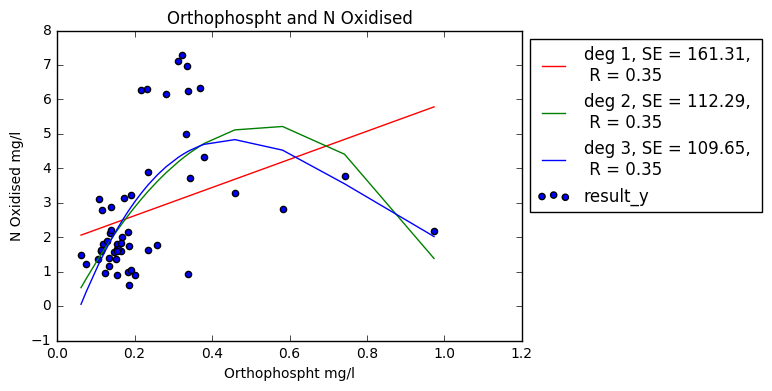

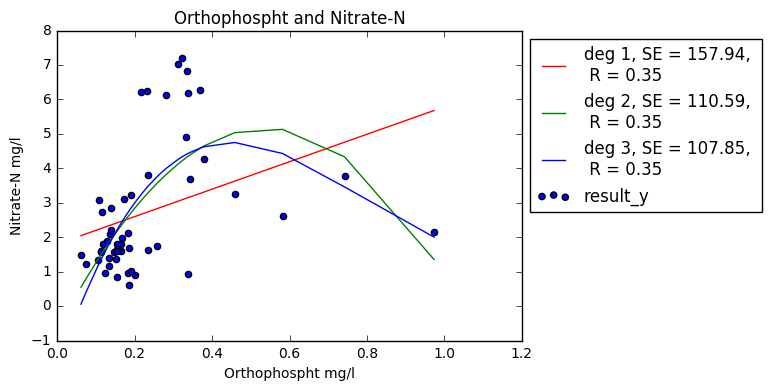

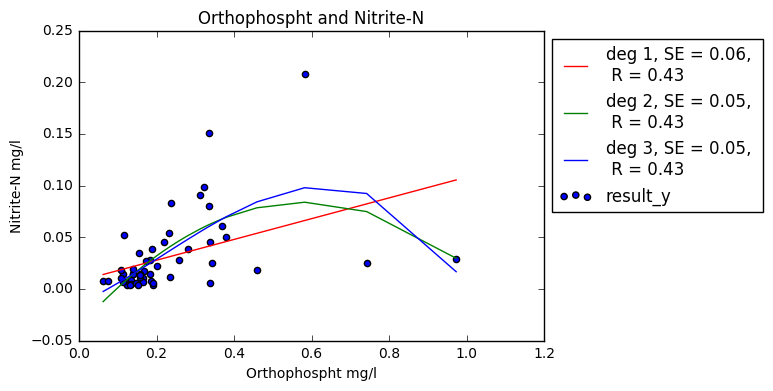

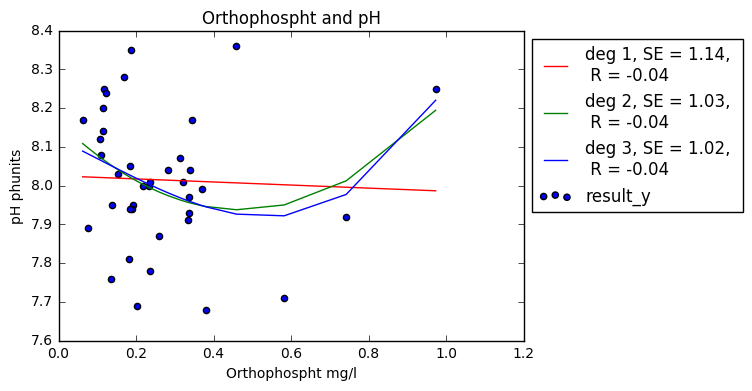

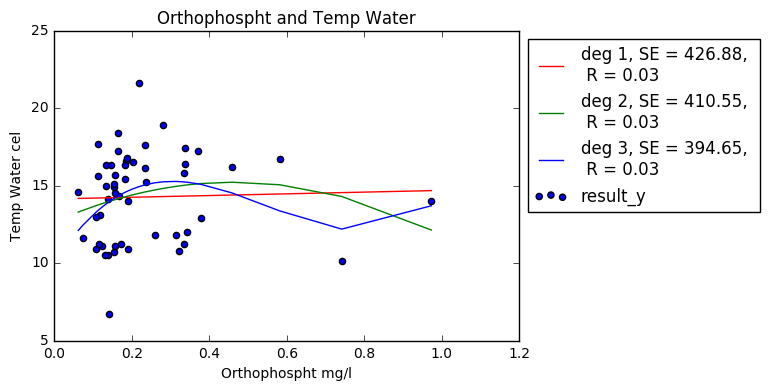

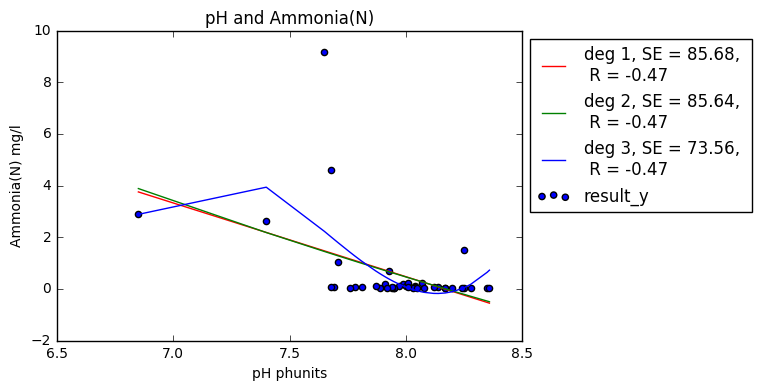

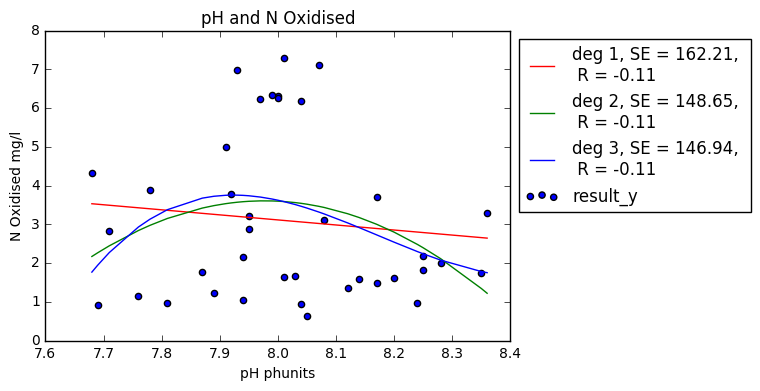

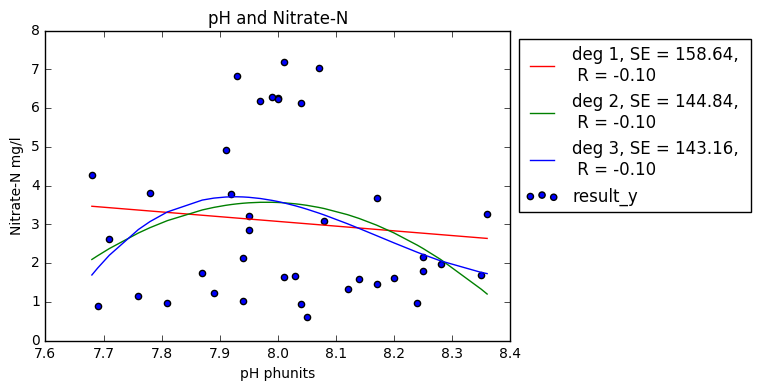

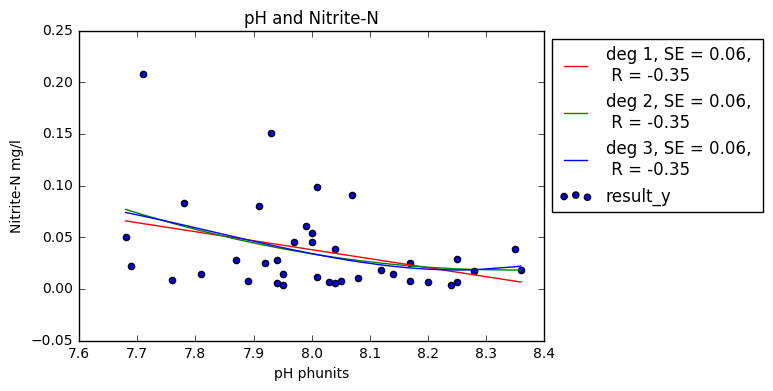

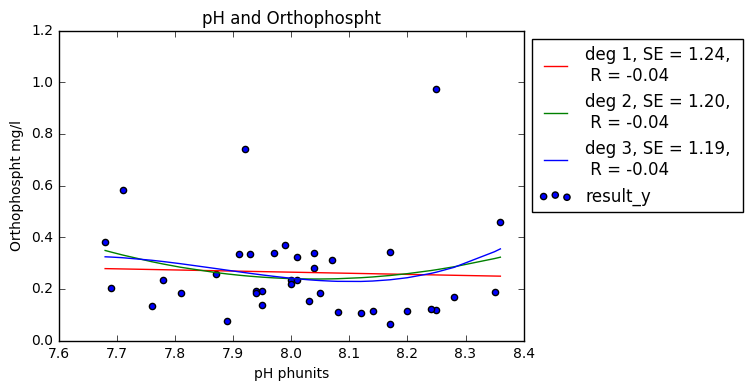

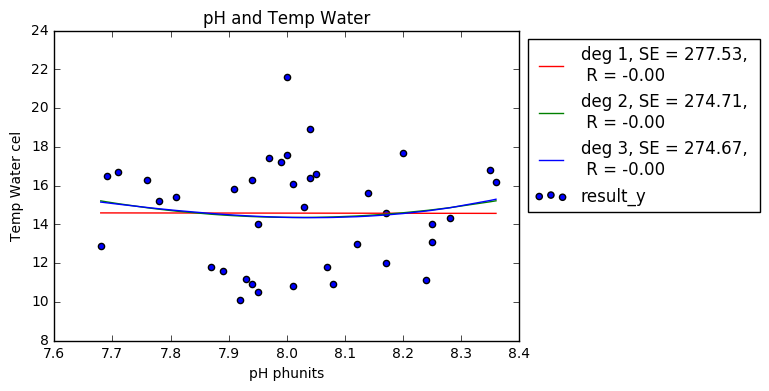

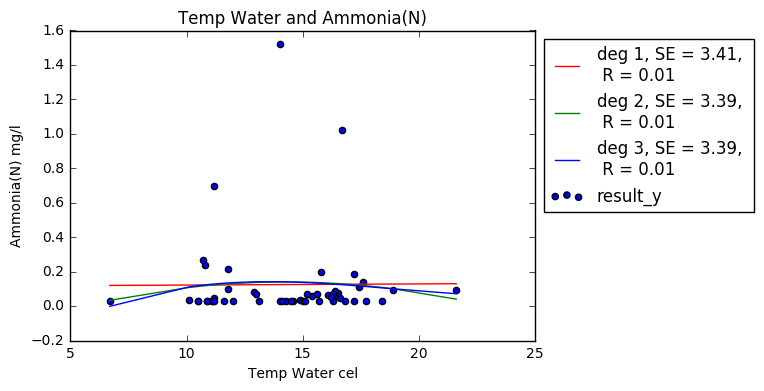

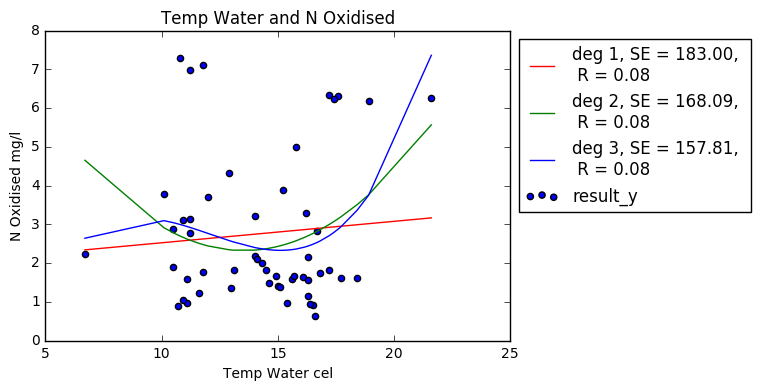

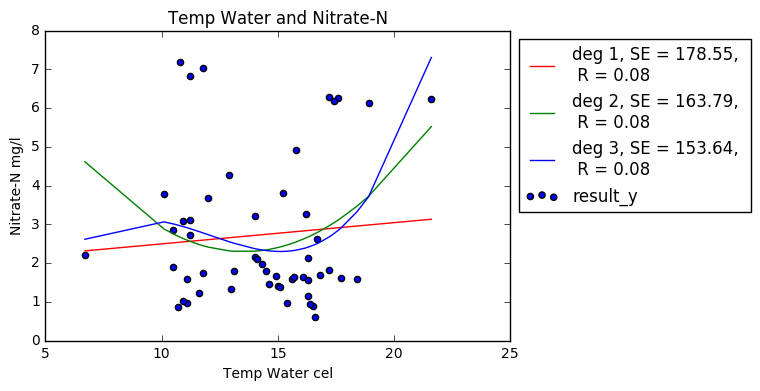

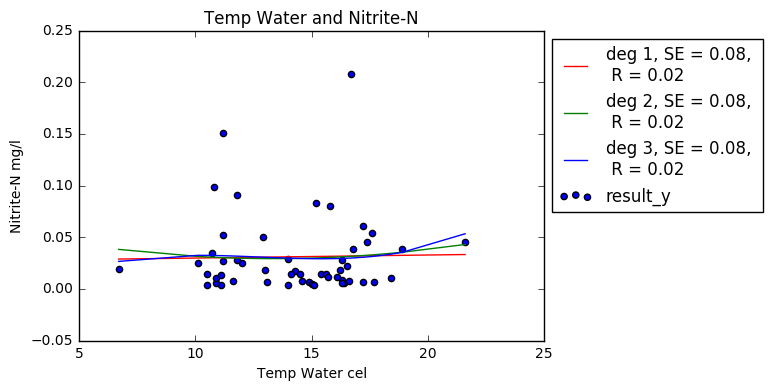

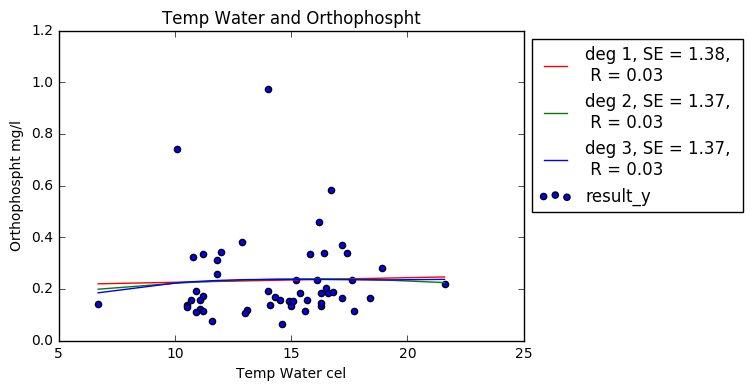

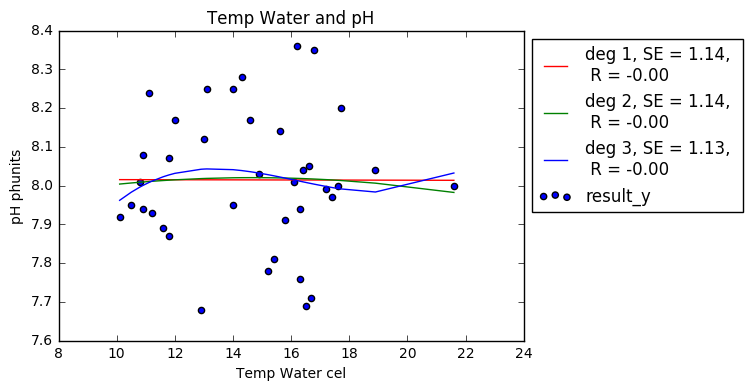

In [10]:
plt.show()
plt.gcf().clear() 